# Course-end Project 1

Luis Aviles

## DESCRIPTION

Data Analysis is the process of creating a story using the data for easy and effective communication. It mostly utilizes visualization methods like plots, charts, and tables to convey what the data holds beyond the formal modeling or hypothesis testing task.

Domain: Healthcare

Cardiovascular diseases are the leading cause of death globally. To identify the causes and to develop a system to predict heart attack in an effective manner is necessary. The presented data has all the information about all the relevant factors that might have an impact on heart health. The data needs to be explained in detail for any further analysis.

# 1. Preliminary analysis

In [3]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [4]:
data = pd.read_excel('data.xlsx')

In [5]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [6]:
# data has 302 rows and 14 columns

In [7]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
data.duplicated().sum()

1

In [10]:
data.drop_duplicates(inplace = True)
data.reset_index(drop = True, inplace = True)

In [11]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


sex   -> sex male = 1 female = 0
cp    -> chest pain type
fbs   -> fasting blood sugar 0 = lower than 120 mg/dl 1 = greater than 120 mg/dl
exang -> exercise induced angina 0 = No 1 = Yes
slope -> 0 = upsloping 1 = flat 2 = downsloping
thal  -> thalessimia 1 = normal 2 = fixed defect 3 = reversible defect

In [12]:
data.rename({'cp' :'chest_pain_type',
             'trestbps':'resting_blood_pressure', 
             'chol':'cholesterol', 
             'fbs' :'fasting_blood_sugar', 
             'restecg':'resting_ecg',
             'thalach' : 'max_heart_rate',
             'exang':'exercise_induced_angina',
             'oldpeak':'st_depression',
             'slope':'st_slope',
             'ca' : 'major_vessels', 
             'thal' :'thalessimia' },axis = 1, inplace = True)

In [13]:
data.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'resting_ecg', 'max_heart_rate',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'major_vessels',
       'thalessimia', 'target'],
      dtype='object')

In [14]:
cat = ['sex','chest_pain_type','fasting_blood_sugar','exercise_induced_angina','st_slope','thalessimia']

In [15]:
data.loc[ : , ~data.columns.isin(cat)].describe()

,age,resting_blood_pressure,cholesterol,resting_ecg,max_heart_rate,st_depression,major_vessels,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,131.602649,246.500000,0.526490,149.569536,1.043046,0.718543,0.543046
std,9.04797,17.563394,51.753489,0.526027,22.903527,1.161452,1.006748,0.498970
min,29.00000,94.000000,126.000000,0.000000,71.000000,0.000000,0.000000,0.000000
25%,48.00000,120.000000,211.000000,0.000000,133.250000,0.000000,0.000000,0.000000
50%,55.50000,130.000000,240.500000,1.000000,152.500000,0.800000,0.000000,1.000000
75%,61.00000,140.000000,274.750000,1.000000,166.000000,1.600000,1.000000,1.000000
max,77.00000,200.000000,564.000000,2.000000,202.000000,6.200000,4.000000,1.000000


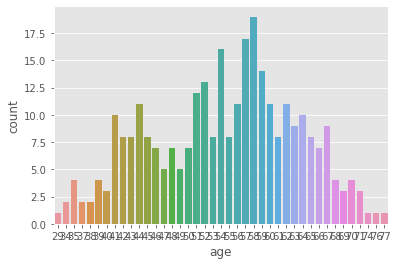

In [24]:
# count plot on single categorical variable
sns.countplot(x ='age', data = data)
 
# Show the plot
plt.show()

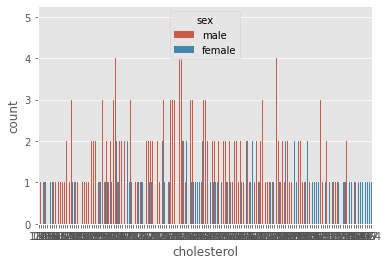

In [30]:
# count plot on single categorical variable
sns.countplot(x ='cholesterol',hue='sex', data = data)
 
# Show the plot
plt.show()

In [31]:
desc= pd.DataFrame(index = cat)
desc['nuinque'] = data[cat].apply(lambda x : x.nunique(), axis = 0)
desc['unique'] = 0
for i in cat :
    desc.loc[i,'unique'] = str(list(data[i].value_counts().index))
desc.T

,sex,chest_pain_type,fasting_blood_sugar,exercise_induced_angina,st_slope,thalessimia
nuinque,2,4,2,2,3,3
unique,"['male', 'female']","['typical angina', 'non-anginal pain', 'atypic...","['< 120mg/ml', '> 120mg/ml']","['no', 'yes']","['downsloping', 'flat', 'upsloping']","['fixed defect', 'reversable defect', 'normal']"


In [28]:
data.thalessimia.value_counts()

fixed defect         167
reversable defect    117
normal                18
Name: thalessimia, dtype: int64

In [29]:
data.loc[data.thalessimia==0 , 'thalessimia'] = 2

#### Note :
- thalessimia has 4 unique categories according to data however in description there are only 3.
- there are 2 records which are identified as '0' ; these can be seen as missing values and hence need to be imputed.
- for imputation we can put in the category with modal value of '2'

### converting the numeric categories for each column to relevent descriptors

In [21]:
data.loc[data.sex == 0 , 'sex'] = 'female'
data.loc[data.sex == 1, 'sex'] = 'male'

data.loc[data.chest_pain_type == 0,'chest_pain_type'] = 'typical angina'
data.loc[data.chest_pain_type == 1,'chest_pain_type'] = 'atypical angina'
data.loc[data.chest_pain_type == 2,'chest_pain_type'] = 'non-anginal pain'
data.loc[data.chest_pain_type == 3,'chest_pain_type'] = 'asymptomatic'

data.loc[data.fasting_blood_sugar == 0,'fasting_blood_sugar'] = '< 120mg/ml'
data.loc[data.fasting_blood_sugar == 1,'fasting_blood_sugar'] = '> 120mg/ml'

data.loc[data.resting_ecg == 0, 'resting_ecg']  = 'normal'
data.loc[data.resting_ecg == 1 , 'resting_ecg'] = 'abnormal'
data.loc[data.resting_ecg == 2 , 'resting_ecg'] = 'hyper'

data.loc[data.exercise_induced_angina == 0, 'exercise_induced_angina'] = 'no'
data.loc[data.exercise_induced_angina == 1, 'exercise_induced_angina'] = 'yes'

data.loc[data.st_slope == 0, 'st_slope'] = 'upsloping'
data.loc[data.st_slope == 1, 'st_slope'] = 'flat'
data.loc[data.st_slope == 2, 'st_slope'] = 'downsloping'

data.loc[data.thalessimia == 1,'thalessimia'] = 'normal'
data.loc[data.thalessimia == 2,'thalessimia'] = 'fixed defect'
data.loc[data.thalessimia == 3,'thalessimia'] = 'reversable defect'

#data.loc[data.target == 0, 'target']= 'Disease -'
#data.loc[data.target == 1, 'target']= 'Disease +'

In [22]:
dsprsnt = data[data.target == 1].copy()
dsabsnt = data[data.target == 0].copy()

# Target Distribution

In [23]:
vc = data.target.value_counts()
vc

Disease +    164
Disease -    138
Name: target, dtype: int64

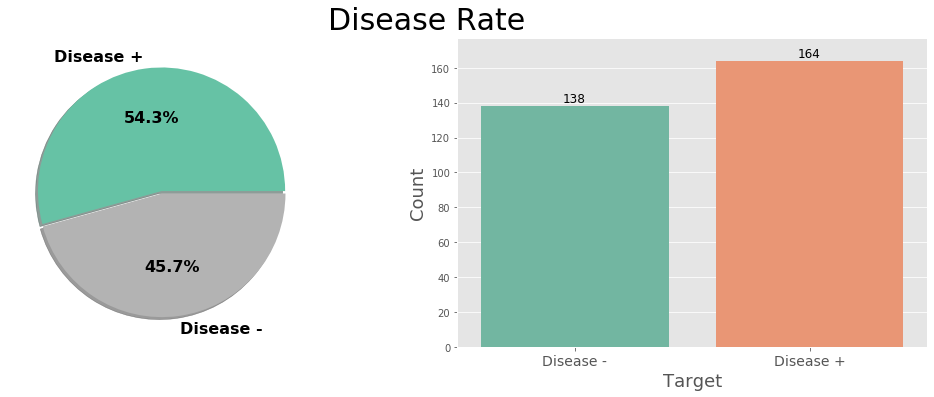

In [56]:
f,axes = plt.subplots(1,2, figsize = (15,6))
# plot no. 1
vc.plot.pie(ax = axes[0], radius = 1, cmap = 'Set2' , explode = [0.01,0.01], shadow = True, autopct = '%1.1f%%',
           textprops = {'family': 'times','color': 'black','weight': 'bold','size': 16}, labels = ['Disease +','Disease -'])
axes[0].set_ylabel('')

# plot no. 2
sns.countplot(data.target,ax = axes[1],palette= 'Set2')
for i in range(len(vc)):
    axes[1].annotate(vc[i], (i-0.05,vc[i]+2), fontsize = 12)
axes[1].set_ylim(0,axes[1].set_ylim()[1]+5)
axes[1].set_xlabel('Target',fontsize = 18, family = 'times')
axes[1].set_ylabel('Count',fontsize = 18, family = 'times')
axes[1].set_xticklabels( ['Disease -','Disease +'], fontsize = 14, family = 'times')
f.suptitle('Disease Rate\n', fontsize = 30, family = 'times')
plt.tight_layout(pad = 4)
plt.show()

#### Note :
* To understand the data better, it is necessary to understand our target variable better.
* The data shows the data collected has almost equal representation of Diseased and Healthy samples

     C. Study the occurrence of CVD across Age.

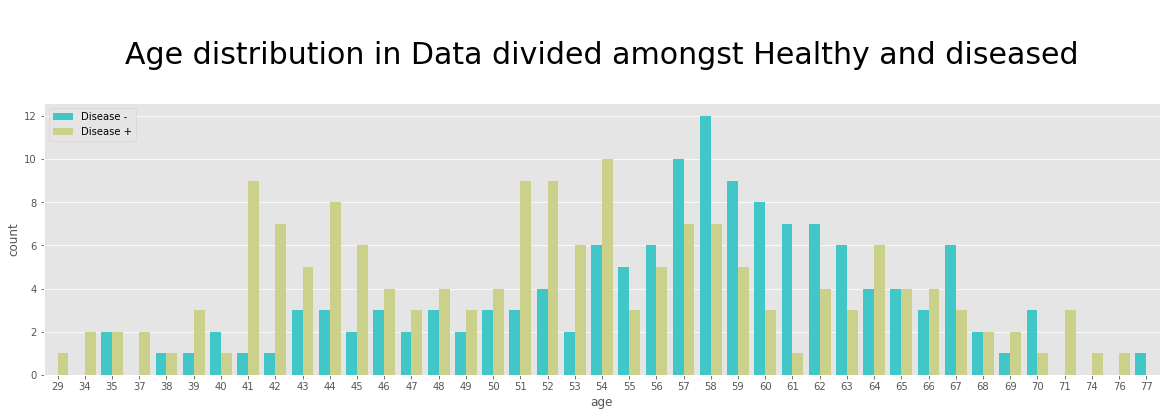

In [57]:
plt.figure(figsize = (20,5))
sns.countplot(data.age, hue = data.target, palette='rainbow')
plt.legend(['Disease -','Disease +'], loc = 'upper left')
plt.title('\nAge distribution in Data divided amongst Healthy and diseased\n', fontsize = 30)
plt.show()

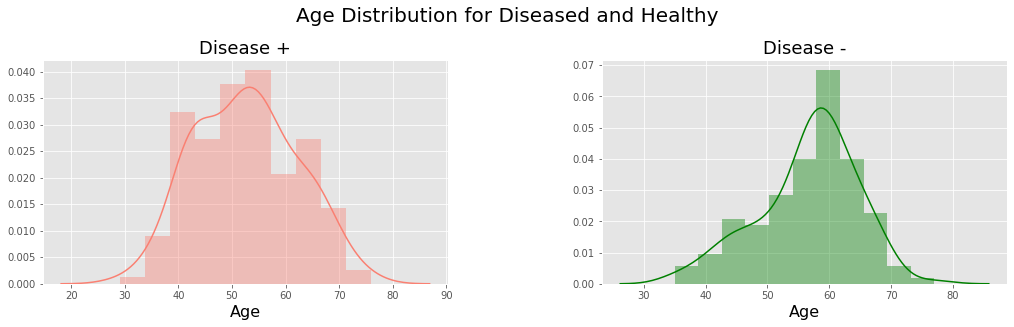

In [58]:
f,axes = plt.subplots(1,2, figsize = (15,5))
sns.distplot(dsprsnt.age,ax = axes[0], color = 'salmon')
sns.distplot(dsabsnt.age, ax = axes[1], color = 'green')
axes[0].set_title('Disease +',fontdict = {'family': 'times','size': 18})
axes[1].set_title('Disease -',fontdict = {'family': 'times','size': 18})
axes[0].set_xlabel('Age', fontdict = {'family': 'georgia','color': 'black','weight': 'normal','size': 16})
axes[1].set_xlabel('Age',fontdict = {'family': 'georgia','color': 'black','weight': 'normal','size': 16})
f.suptitle('Age Distribution for Diseased and Healthy\n\n ',fontsize= 20)
plt.tight_layout(w_pad= 12, pad = 4 )
plt.show()

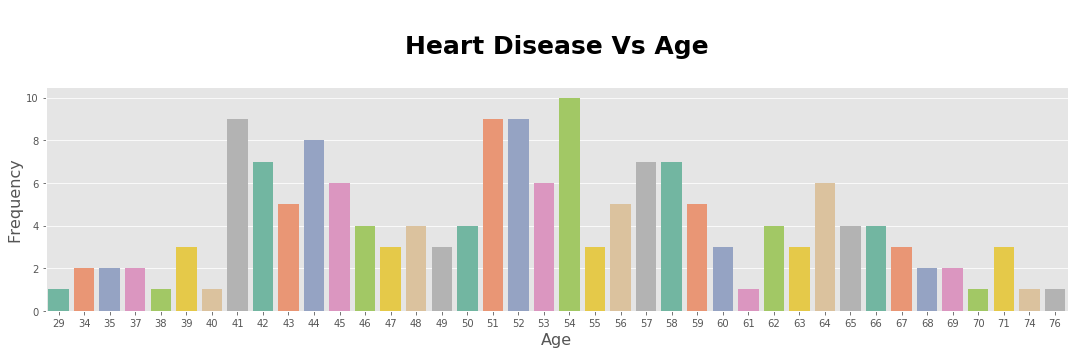

In [59]:
plt.figure(figsize = (15,5))
sns.countplot(dsprsnt.age, palette='Set2')
plt.title('\nHeart Disease Vs Age\n',family='times', weight ='bold',fontsize= 25)
plt.tight_layout( )
plt.xlabel('Age',family='times',fontsize= 16)
plt.ylabel('Frequency',family='georgia',fontsize= 16)
plt.show()

#### Note :
*  the chances of heart attack across age has intermittent peaks 
*  tendency of disease increases after 40 
*  the age groups 41 - 45 and 51 - 54 have the highest chances of heart attack

In [0]:
def cat_plot(var):
    f,axes = plt.subplots(1,2, figsize = (18,5))
    vc = data[var].value_counts() 
    nouniq = data[var].nunique()
    # overall pie
    vc.plot.pie(radius = 1.25,ax = axes[0], cmap = 'Set3', autopct = '%0.1f%%',
                                        textprops = {'family': 'times','color': 'black','weight': 'bold','size': 16},
                                        explode = [0.02]*nouniq,shadow = True,)
    axes[0].set_ylabel('')
    axes[0].set_title('Overall {} Distribution\n'.format(var.capitalize()),family='times', weight ='bold',fontsize= 25)
    
    # count plot
    #pd.crosstab(data[var], data.target).plot.bar(cmap = 'Set2', ax = axes[1])
    sns.countplot(x = data[var], hue = data.target, ax = axes[1], palette='Set2')
    plt.xticks( fontsize = 15, color = 'black' , family =  'times', rotation = 0)
    axes[1].set_xlabel(var.capitalize(),fontsize = 20, color = 'black' , family =  'times', rotation = 0)
    axes[1].set_ylabel('Count',fontsize = 20, color = 'black' , family =  'times')
    axes[1].legend(['Disease -','Disease +'])
    axes[1].set_title('Heart Disease by {}\n'.format( var.capitalize()) ,family='times', weight ='bold',fontsize= 25)
    plt.tight_layout(pad = 4 )
    plt.show()

In [0]:
def real_distribution(var):
    f,axes = plt.subplots(1,2, figsize = (15,5))
    sns.distplot(dsprsnt[var],ax = axes[0], color = 'salmon')
    sns.distplot(dsabsnt[var], ax = axes[0], color = 'green')
    sns.boxplot(y = data[var], x = data.target, ax = axes[1], palette='Set2')
    axes[0].set_xlabel(var, fontdict = {'family': 'times','color': 'black','weight': 'normal','size': 16})
    axes[1].set_ylabel(var, fontdict = {'family': 'times','color': 'black','weight': 'normal','size': 16})
    axes[1].set_xlabel('Target', fontdict = {'family': 'times','color': 'black','weight': 'normal','size': 16})
    axes[1].set_xticklabels(['Disease -','Disease +'],{'family': 'times','color': 'black','weight': 'normal','size': 12})
    f.suptitle('{} vs Disease\n\n '.format(var.capitalize()),fontsize= 20, family = 'times')
    plt.tight_layout(w_pad= 12, pad = 4 )
    plt.show()

###       D. Study the composition of overall patients w.r.t . Gender

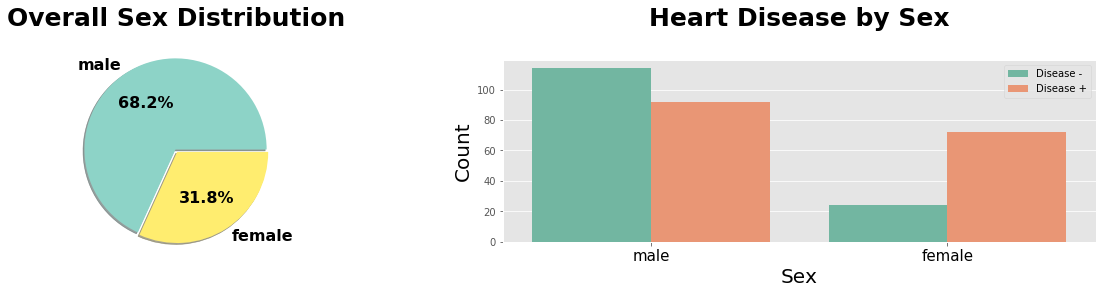

In [62]:
cat_plot('sex')

# E. Can we detect heart attack based on anomalies in Resting Blood Pressure of the patient?

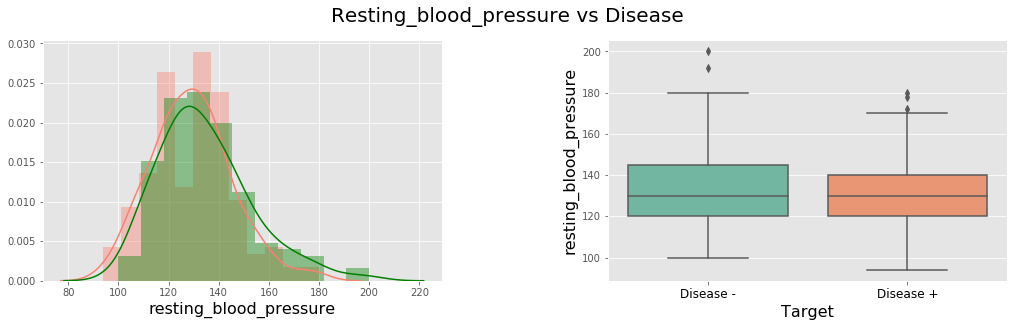

In [63]:
real_distribution('resting_blood_pressure')

# Resting blood pressure for male and female vs target

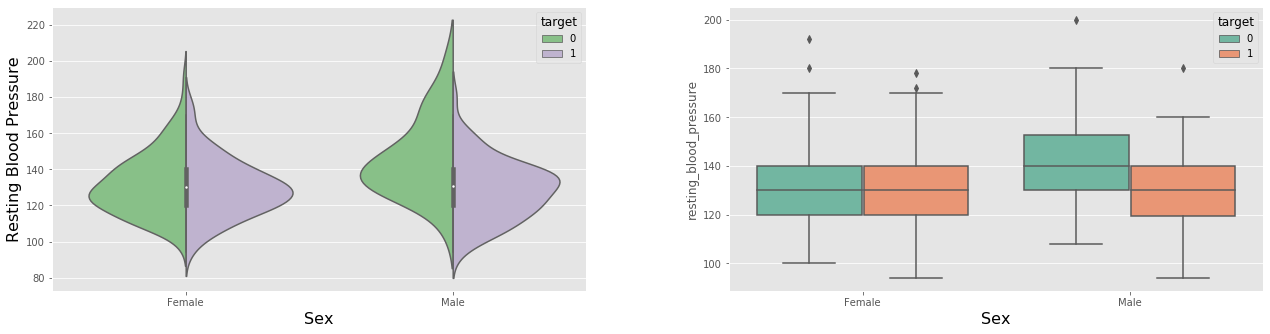

In [64]:
f,axes = plt.subplots(1,2,figsize = (18,5))
sns.violinplot(y = 'resting_blood_pressure', x = 'sex',hue = 'target',data = data, split = True, palette= 'Accent', ax = axes[0])
axes[0].set_xlabel('Sex', fontdict = {'family': 'georgia','color': 'black','weight': 'normal','size': 16})
axes[0].set_ylabel('Resting Blood Pressure', fontdict = {'family': 'georgia','color': 'black','weight': 'normal','size': 16})
axes[0].set_xticklabels(['Female','Male'])
sns.boxplot(x = data.sex,  y = data.resting_blood_pressure, hue = data.target, ax = axes[1], palette='Set2')
axes[1].set_xticklabels(['Female','Male'])
axes[1].set_xlabel('Sex',fontdict = {'family': 'georgia','color': 'black','weight': 'normal','size': 16})
plt.tight_layout(w_pad = 10, pad = 2)
plt.show()


    F. Describe the relationship between Cholesterol levels and our target variable.

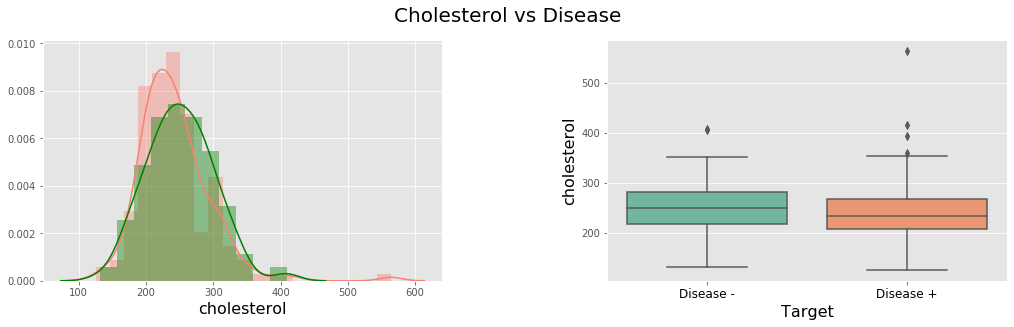

In [65]:
real_distribution('cholesterol')

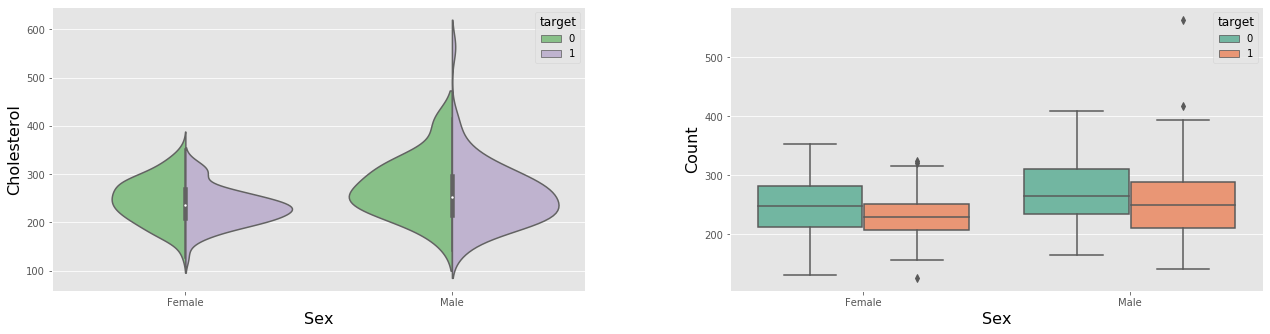

In [66]:
f,axes = plt.subplots(1,2,figsize = (18,5))
sns.violinplot(y = 'cholesterol', x = 'sex',hue = 'target',data = data, split = True, palette= 'Accent', ax = axes[0])
axes[0].set_xlabel('Sex', fontdict = {'family': 'georgia','color': 'black','weight': 'normal','size': 16})
axes[0].set_ylabel('Cholesterol', fontdict = {'family': 'georgia','color': 'black','weight': 'normal','size': 16})
axes[0].set_xticklabels(['Female','Male'])
sns.boxplot(x = data.sex,  y = data.cholesterol, hue = data.target, ax = axes[1], palette='Set2')
axes[1].set_xticklabels(['Female','Male'])
axes[1].set_xlabel('Sex',fontdict = {'family': 'georgia','color': 'black','weight': 'normal','size': 16} )
axes[1].set_ylabel('Count',fontdict = {'family': 'georgia','color': 'black','weight': 'normal','size': 16} )
plt.tight_layout(w_pad = 10, pad = 2)
plt.show()

    G. What can be concluded about the relationship between peak exercising and occurrence of heart attack.

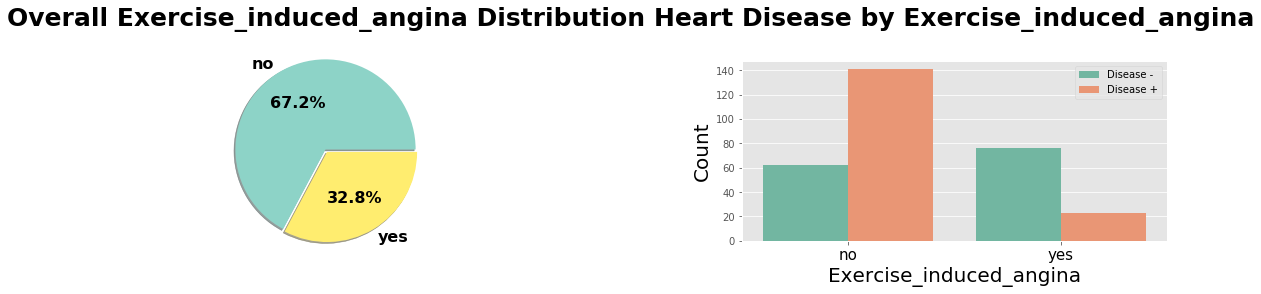

In [67]:
cat_plot('exercise_induced_angina')

    H. Is thalassemia a major cause of CVD?

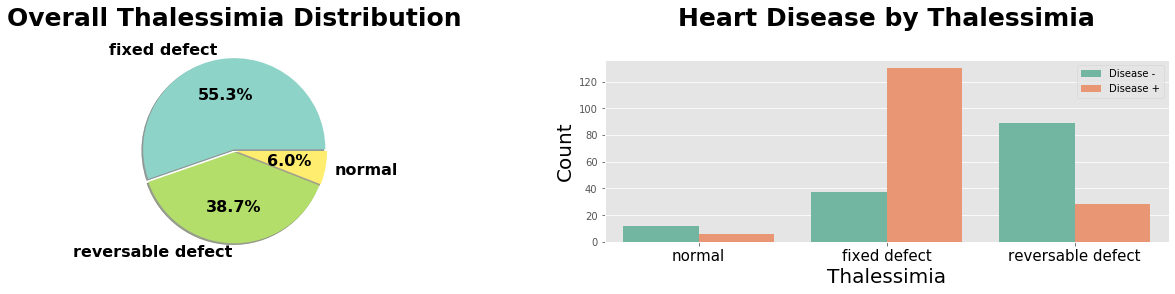

In [68]:
cat_plot('thalessimia')

    I. How are the other factors determining the occurrence of CVD?

## 1. Resting_ecg

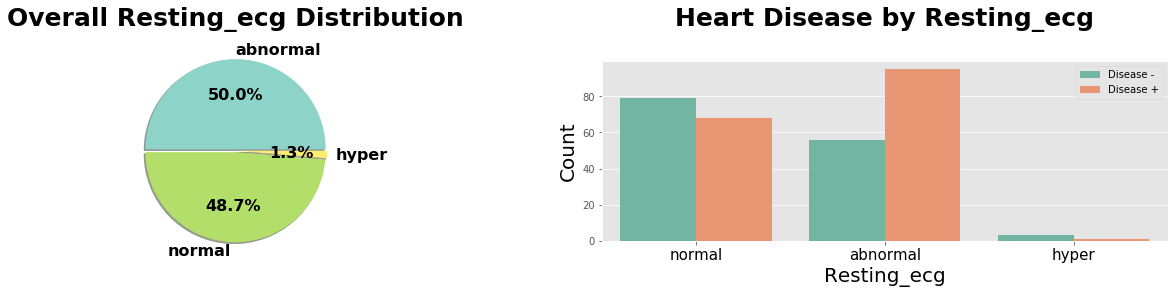

In [69]:
cat_plot('resting_ecg')

## 2. Fasting Blood Sugar

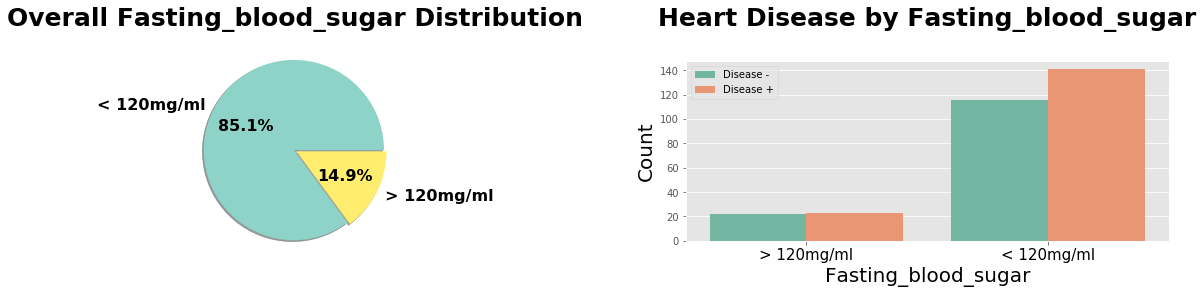

In [70]:
cat_plot('fasting_blood_sugar')

## 3. Max Heart Rate Achieved

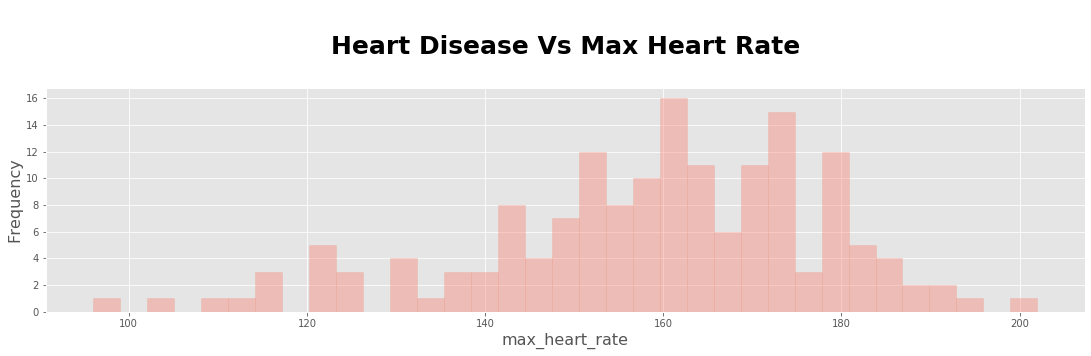

In [71]:
#real_distribution('max_heart_rate')
plt.figure(figsize = (15,5))
sns.distplot(dsprsnt.max_heart_rate, kde = False, bins = 35, hist_kws = {'edgecolor':'darksalmon', 'color' :'salmon'})
plt.title('\nHeart Disease Vs Max Heart Rate\n',family='times', weight ='bold',fontsize= 25)
plt.tight_layout( )
plt.xlabel('max_heart_rate',family='times',fontsize= 16)
plt.ylabel('Frequency',family='georgia',fontsize= 16)
plt.show()

# 4. major_vessels

In [72]:
data.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'resting_ecg', 'max_heart_rate',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'major_vessels',
       'thalessimia', 'target'],
      dtype='object')

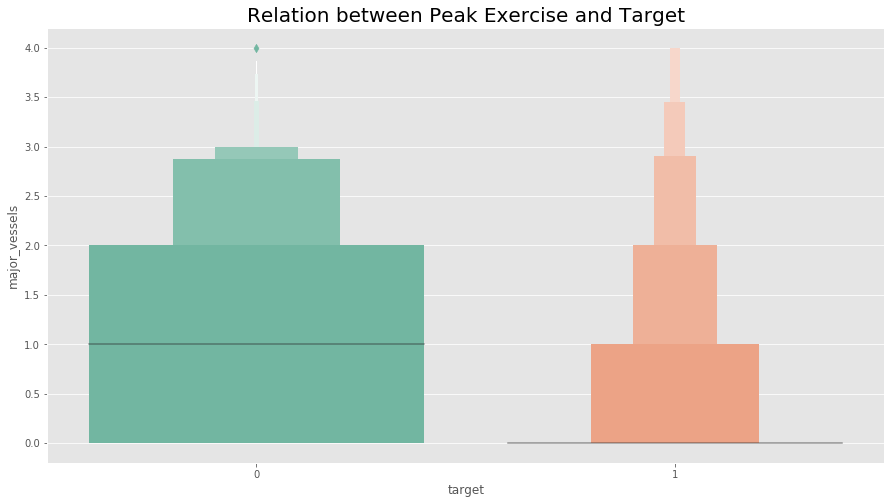

In [73]:
plt.figure(figsize= (15,8))
sns.boxenplot(data['target'], data['major_vessels'], palette = 'Set2')
plt.title('Relation between Peak Exercise and Target', fontsize = 20, fontweight = 30)
plt.show()

The above Bivariate plot between Target and Number of Major Vessels, shows that the patients who are more likely to suffer from Heart diseases are having high values of Major Vessels wheras the patiets who are very less likely to suffer from any kind of heart diseases have very low values of Major Vessels.

    J. Use a pair plot to understand the relationship between all the given variables.

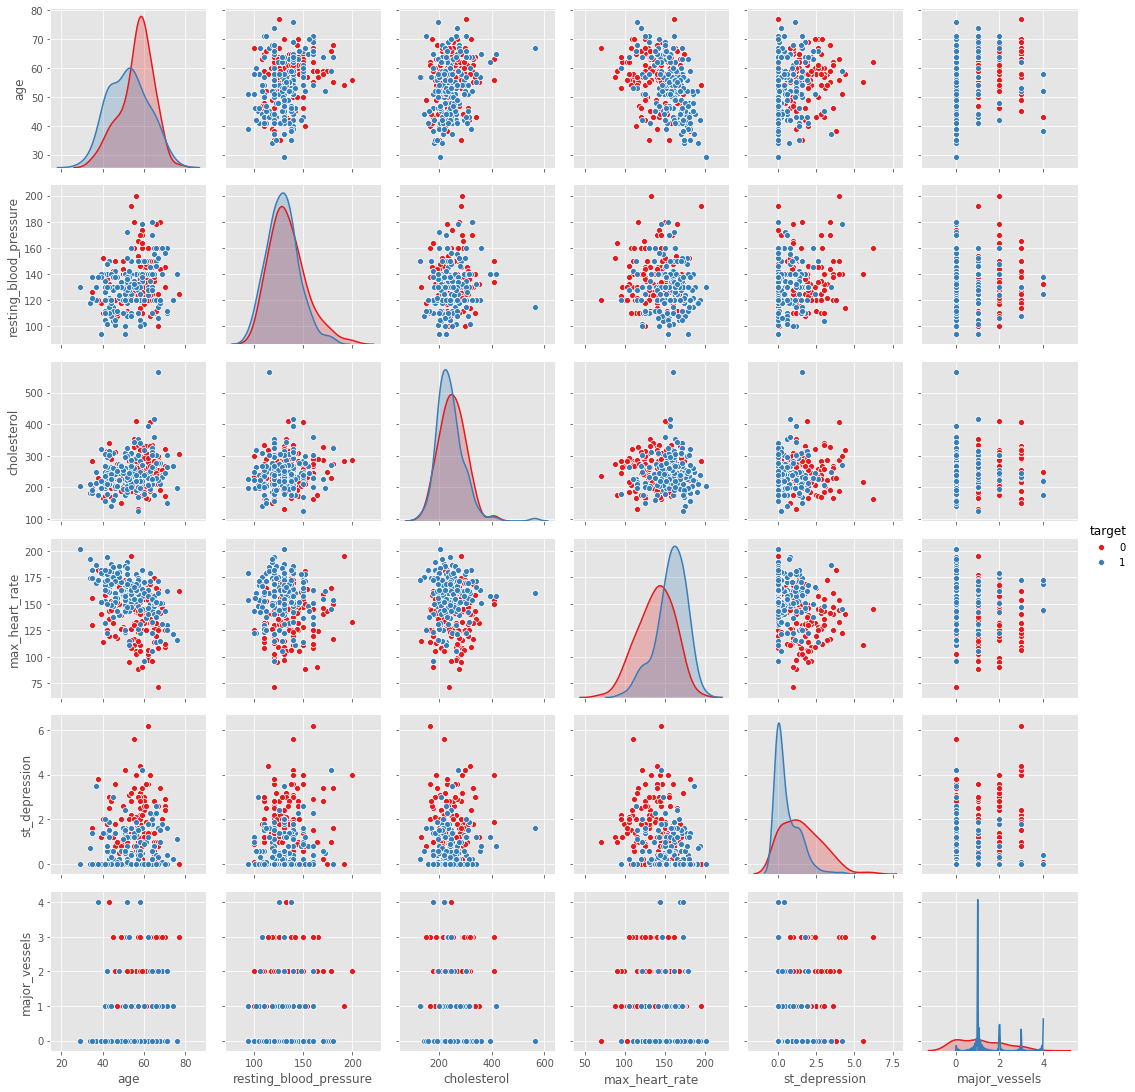

In [74]:
sns.pairplot(data, hue = 'target', palette='Set1')

## apply logistic Regression

In [75]:
from sklearn.model_selection import train_test_split as split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

data_dummy = pd.get_dummies(data)
data_dummy.columns = data_dummy.columns.str.replace(' ','_')

train, test = split(data_dummy, test_size = .30, random_state = 12)
train.shape

train.head(2)

X_train = train.drop('target', axis = 1)
Y_train = train.target
X_test = test.drop('target', axis = 1)
Y_test = test.target
lr = LogisticRegression()
lr.fit(X_train,Y_train)

pred = lr.predict(X_test)

accuracy_score(y_true = Y_test,y_pred = pred)

print(classification_report(y_true=Y_test,y_pred = pred))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85        45
           1       0.88      0.80      0.84        46

    accuracy                           0.85        91
   macro avg       0.85      0.85      0.85        91
weighted avg       0.85      0.85      0.85        91



In [83]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test, pred))

[[40  5]
 [ 9 37]]
